In [108]:
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

#### Train using scikit

In [66]:
X = housing.data["MedInc"].values.reshape(-1,1)
# X = housing.data
y = housing.target.values
reg = LinearRegression().fit(X,y)
print("Coefficients:", reg.coef_) # what about B0?
print("R squared:", reg.score(X,y))


Coefficients: [0.41793849]
R squared: 0.4734474918071989


In [37]:
X = housing.data["MedInc"]
y = housing.target

coef = np.random.random(2) + 1 #adding 1 so it won't be 0
xi = X
yi = y
x_mean = X.mean()
y_mean = y.mean()

B1 = ((((xi-x_mean) * (yi-y_mean)).sum()) / ((xi-x_mean)**2).sum())
B0 = y_mean - B1 * x_mean

f = lambda x: B0 + B1*x

print("Coefficients:", [B1,B0])

TSS = ((yi-y_mean)**2).sum()
RSS = ((yi - xi.apply(f))**2).sum()
R_squared = 1 - (RSS / TSS)

print("R squared:", R_squared)


Coefficients: [0.41793849201896244, 0.45085576703268027]
R squared: 0.47344749180719903


#### Plot data and line

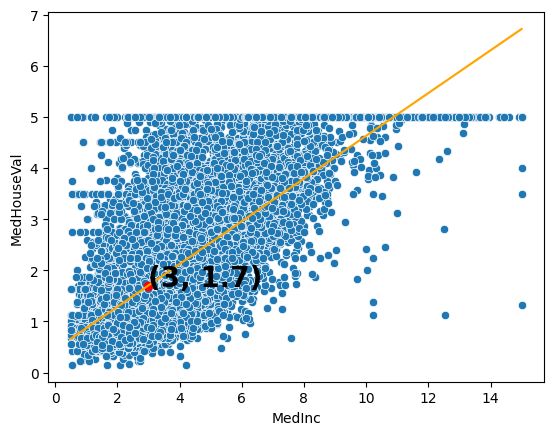

In [79]:
X = housing.data["MedInc"]

edge_arr = X[(X == X.min()) | (X == X.max())]


ax = sns.scatterplot(x="MedInc", y=housing.target, data=housing.data)
y_pred = edge_arr.apply(f)
y_pred2 = reg.predict(edge_arr.values.reshape(-1,1))

sns.lineplot(x=edge_arr, y=y_pred, color="orange")
# sns.lineplot(x=edge_arr, y=y_pred2, color="black") # same as my lineplot....


highlight_x = 3
highlight_y = f(highlight_x)
highlight_y = round(highlight_y,2)
plt.scatter(highlight_x, highlight_y, color='red')
plt.text(highlight_x, highlight_y, f'({highlight_x}, {highlight_y})', fontsize=20, fontweight='bold')
plt.show()



In [103]:
X = housing.data["MedInc"].values.reshape(-1,1)
X2 = X*2
X = np.concatenate((X,X2), axis=1)
y = housing.target

reg2 = LinearRegression().fit(X,y)
print(reg2.coef_)
print(reg2.score(X,y))

[-1.49884053e+12  7.49420263e+11]
0.4734311668345994


##### No suprisingly, after adding data that has no correlation with the target at all, no change to the R-squared score

##### Fit using all featuers

In [106]:
X = housing.data
y = housing.target

reg2 = LinearRegression().fit(X,y)
print("Coefficients:",reg2.coef_)
print("R-squared score:",reg2.score(X,y))

Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
R-squared score: 0.606232685199805


##### Fit using all fetures except Population

In [107]:
X = housing.data.drop(columns=["Population"])
y = housing.target

reg2 = LinearRegression().fit(X,y)
print("Coefficients:",reg2.coef_)
print("R-squared score:",reg2.score(X,y))

Coefficients: [ 0.43675975  0.00955547 -0.10713406  0.6449022  -0.00381933 -0.42069942
 -0.43404215]
R-squared score: 0.6062193051855558


##### Very small and not significant difference

#### Now do a quadratic least squares fit

In [111]:
X = housing.data["MedInc"].values.reshape(-1,1)
poly_preprocess = PolynomialFeatures(degree=2)
X = poly_preprocess.fit_transform(X)
y = housing.target.values
reg = LinearRegression().fit(X,y)
print("Coefficients:", reg.coef_) # what about B0?
print("R squared:", reg.score(X,y))


Coefficients: [ 0.          0.53211265 -0.01050419]
R squared: 0.47802403432955454


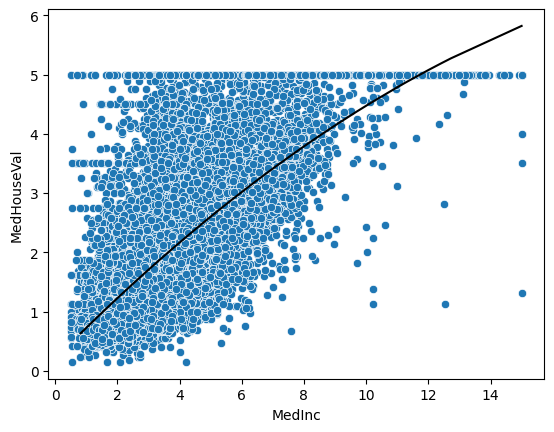

Coefficients: [ 0.          0.53211265 -0.01050419]
R squared: 0.47802403432955454


In [149]:
X = housing.data["MedInc"].values.reshape(-1,1)
y = housing.target.values

poly_preprocess = PolynomialFeatures(degree=2)
X_new = poly_preprocess.fit_transform(X)
reg = LinearRegression().fit(X_new,y)

ax = sns.scatterplot(x="MedInc", y=housing.target, data=housing.data)
y_pred2 = reg.predict(X_new)

random_indices = np.random.randint(0, len(X.flatten()) + 1, size=1000)

X_plot = X.flatten()[random_indices]
y_pred_plot = y_pred2[random_indices]
sns.lineplot(x=X_plot, y=y_pred_plot, color="black")
plt.show()
print("Coefficients:", reg.coef_) # what about B0?
print("R squared:", reg.score(X_new,y))


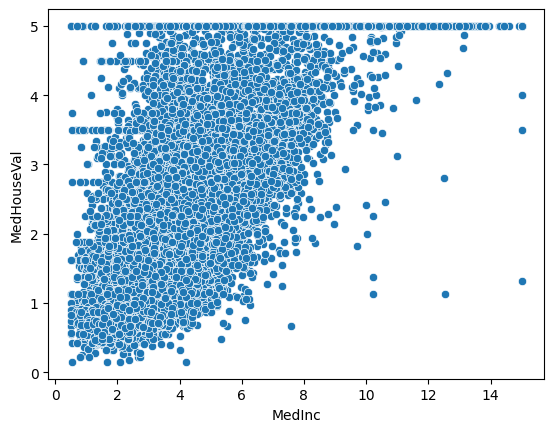

In [168]:
from sklearn.linear_model import Lasso, Ridge

X = housing.data["MedInc"].values
y = housing.target.values

random_indices = np.random.randint(0, len(X.flatten()), size=5000)
# X = X[random_indices]
# y = y[random_indices]

X = X.reshape(-1,1)

poly_preprocess = PolynomialFeatures(degree=4)
X_new = poly_preprocess.fit_transform(X)
reg = LinearRegression().fit(X_new,y)
L1 = Lasso().fit(X_new,y)
L2 = Ridge().fit(X_new,y)

ax = sns.scatterplot(x="MedInc", y=housing.target, data=housing.data)
y_pred2 = reg.predict(X_new)
y_pred_l1 = L1.predict(X_new)
y_pred_l2 = L2.predict(X_new)

# random_indices = np.random.randint(0, len(X.flatten()), size=5000)
# X_plot = X.flatten()
# y_pred_plot = y_pred2[random_indices]
# sns.lineplot(x=X_plot, y=y_pred2, color="black")
# sns.lineplot(x=X_plot, y=y_pred_l1, color="black")
# sns.lineplot(x=X_plot, y=y_pred_l2, color="black")
# plt.show()
# print("Coefficients:", reg.coef_) # what about B0?
# print("R squared:", reg.score(X_new,y))